<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/pelismodelos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd   # Tratamiento dataframes
import numpy as np # Mates
import matplotlib.pyplot as plt #Gráficas
import seaborn as sns #Gráficas aún más chulas
import scipy # Estadísticas, ciencia
import os
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

nombre_fichero = "/content/datos_peliculas-220326-142410 (1).csv"

pelis=pd.read_csv(nombre_fichero, sep=",")



pelis.head(11)


,pelicula,año,ratings,genero,ventas,presupuesto,secuela,vistas_youtube,positivos_youtube,negativos_youtube,comentarios,seguidores_agregados
0,13 Sins,2014,6.3,8,9130,4000000.0,1,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,1,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,2,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2,3145573,12163,610,1082,1923800.0
5,A Long Way Off,2014,4.6,3,29000,500000.0,1,91137,112,7,1,310000.0
6,A Million Ways to Die in the West,2014,6.1,8,42600000,40000000.0,1,3013011,9595,419,1020,8153000.0
7,A Most Violent Year,2014,7.1,1,5750000,20000000.0,1,1854103,2207,197,593,130655.0
8,A Walk Among the Tombstones,2014,6.5,10,26000000,28000000.0,1,2213659,2210,419,382,125646.0
9,About Last Night,2014,6.1,8,48600000,12500000.0,1,5218079,11709,532,770,21697300.0


In [29]:
pelis.shape

(231, 11)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

pelis=pelis.drop(columns="pelicula")

In [30]:
X_train,X_test,y_train,y_test=train_test_split(pelis.drop(columns="genero"),pelis["genero"],test_size=0.3,random_state=1234)

In [31]:
clasificador=KNeighborsClassifier(3)

In [32]:
clasificador

KNeighborsClassifier(n_neighbors=3)

In [34]:
# brute tree ball 

clasificador.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred=clasificador.predict(X_test)

In [36]:

y_pred


array([ 8,  8,  1,  3,  1,  1,  3,  9,  1,  3,  1,  3,  3,  1,  3,  3,  9,
        1,  8,  1,  8,  1,  2,  8,  1,  1,  1,  2,  1,  3,  1,  8,  1,  3,
        8,  1,  1,  1,  1,  1,  8,  3, 12,  1,  1,  3,  1,  1,  2,  3,  1,
        1,  1,  1,  1,  3,  1,  2,  8,  1,  8,  3, 12,  8,  8,  8,  3,  8,
        1,  3])

In [37]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,8,9,12
genero,,,,,,
1,11,0,2,3,0,2
2,1,0,0,0,0,0
3,4,0,3,1,1,0
6,1,0,0,0,0,0
8,8,0,5,7,1,0
9,2,1,2,1,0,0
10,1,0,3,0,0,0
12,2,1,0,0,0,0
15,2,2,1,2,0,0


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.3

In [39]:
clasificador1=KNeighborsClassifier(3,algorithm='brute', leaf_size=40, metric='euclidean')



In [40]:
clasificador1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=40, metric='euclidean',
                     n_neighbors=3)

In [41]:
y_pred1=clasificador1.predict(X_test)

In [42]:
accuracy_score(y_pred1,y_test)

0.3

In [46]:
import matplotlib.pyplot as plt

In [47]:
lista_resutaltado=[]
for i in range(3,50):
    clasificador=KNeighborsClassifier(i,algorithm="brute")
    clasificador.fit(X_train,y_train)
    y_pred=clasificador.predict(X_test)
    resultado=accuracy_score(y_test,y_pred)
    lista_resutaltado.append(resultado)
    
lista_resutaltado_1=[]
for i in range(3,50):
    clasificador=KNeighborsClassifier(i,algorithm="auto")
    clasificador.fit(X_train,y_train)
    y_pred=clasificador.predict(X_test)
    resultado=accuracy_score(y_test,y_pred)
    lista_resutaltado_1.append(resultado)

lista_resutaltado_2=[]
for i in range(3,50):
    clasificador=KNeighborsClassifier(i,algorithm="ball_tree")
    clasificador.fit(X_train,y_train)
    y_pred=clasificador.predict(X_test)
    resultado=accuracy_score(y_test,y_pred)
    lista_resutaltado_2.append(resultado)


lista_resutaltado_3=[]
for i in range(3,50):
    clasificador=KNeighborsClassifier(i,algorithm="kd_tree")
    clasificador.fit(X_train,y_train)
    y_pred=clasificador.predict(X_test)
    resultado=accuracy_score(y_test,y_pred)
    lista_resutaltado_3.append(resultado)

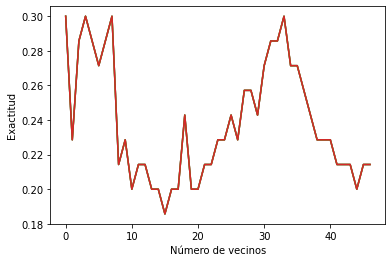

In [48]:
plt.plot(lista_resutaltado)
plt.plot(lista_resutaltado_1)
plt.plot(lista_resutaltado_2)
plt.plot(lista_resutaltado_3)
plt.ylabel("Exactitud")
plt.xlabel("Número de vecinos")## Grafico la posición no la K ¡OJO!
plt.show()

In [51]:
Lista=[]
for i in range(20):
    X_train,X_test,y_train,y_test=train_test_split(pelis.drop(columns="genero"),pelis["genero"],test_size=0.3)
    clf=KNeighborsClassifier(3)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
#     print("="*20)
    Lista.append(accuracy_score(y_pred,y_test))
#     print("Exactitud: ",accuracy_score(y_pred,y_test))

In [52]:
np.mean(Lista)

0.3157142857142857

In [53]:
from sklearn.model_selection import LeaveOneOut

In [55]:
LOO=LeaveOneOut()
y_pred=[]
xx=0
X=pelis.drop(columns="genero")
y=pelis["genero"]

In [56]:
for train_index,test_index in LOO.split(pelis):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train=y.iloc[train_index]
    clf=KNeighborsClassifier(3)
    clf.fit(X_train,y_train)
    y_pred.append(clf.predict(X_test))

In [57]:
accuracy_score(y,y_pred)

0.31601731601731603